## Imports 

In [419]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Loading the data and rename the columns to match the documentation

In [420]:
#load data/moviesummaries/character.metadata.tsv
character_metadata = pd.read_csv('../data/moviesummaries/character.metadata.tsv', sep='\t', header=None)

#load data/moviesummaries/plot_summaries.txt
column_types = {
    3: 'datetime64'  # Specify the data type for column 0 (replace with the actual column number)
    # Add more columns as needed
}
plot_summaries = pd.read_csv('../data/moviesummaries/plot_summaries.txt', sep='\t', header=None)

#load data/moviesummaries/movie.metadata.tsv
movie_metadata = pd.read_csv('../data/moviesummaries/movie.metadata.tsv', sep='\t', header=None)

#load data/moviesummaries/name.clusters.txt
name_clusters = pd.read_csv('../data/moviesummaries/name.clusters.txt', sep='\t', header=None)

In [421]:
#rename columns to match documentation 

character_metadata.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", 
                              "Actor height", "Actor ethnicity", "Actor name", "Actor age", "Freebase character/actor map ID", 
                              "Freebase character ID", "Freebase actor ID"]

character_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [422]:
#rename columns to match documentation

plot_summaries.columns = ["Wikipedia movie ID", "Summary"]

plot_summaries.head()

,Wikipedia movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [423]:
#rename columns to match documentation

movie_metadata.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie revenue", "Movie runtime",
                          "Movie languages", "Movie countries", "Movie genres"]

movie_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [424]:
# rename columns to match documentation

name_clusters.columns = ["Character name", "Freebase character/actor map ID"]

name_clusters.head()

,Character name,Freebase character/actor map ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


## Merging of the tables

In [425]:
# Merging character_metadata and movie_metadata on Wikipedia movie ID

character_movie = pd.merge(character_metadata, movie_metadata, on='Wikipedia movie ID', how='outer') #The outer join yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate.
character_movie.head()
are_columns_equal = (character_movie['Freebase movie ID_x'] == character_movie['Freebase movie ID_y']).all()
character_movie.head()

,Wikipedia movie ID,Freebase movie ID_x,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age,...,Freebase character ID,Freebase actor ID,Freebase movie ID_y,Movie name,Movie release date_y,Movie revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,/m/0bgcj3x,/m/03wcfv7,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,/m/0bgchn4,/m/0346l4,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,/m/0bgchn_,/m/01vw26l,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,/m/0bgchnq,/m/034hyc,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,/m/0bgchp9,/m/01y9xg,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


This merge might not be usefull +doubles the columns of ID and release ...

In [426]:
#merging movie_metadata and plot_summaries on Wikipedia movie ID

movie_plot = pd.merge(movie_metadata, plot_summaries, on='Wikipedia movie ID', how='outer')
movie_plot.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."


If we want to use this merged data for the rest of the analysis we need to change the code bellow -> see with the others

## Data completeness

In [427]:
# check the number and percentage of null values in each column of character_metadata as well as the number of different values in each column. Show the results in a single dataframe.

character_metadata_null = pd.DataFrame(character_metadata.isnull().sum(), columns=['Number of null values'])
character_metadata_null['Percentage of null values'] = character_metadata_null['Number of null values'] / len(character_metadata)
character_metadata_null['Number of unique values'] = character_metadata.nunique()

character_metadata_null

,Number of null values,Percentage of null values,Number of unique values
Wikipedia movie ID,0,0.000000,64330
Freebase movie ID,0,0.000000,64330
Movie release date,9995,0.022178,18476
Character name,257875,0.572205,126629
Actor date of birth,106145,0.235528,29494
Actor gender,45609,0.101203,2
Actor height,295845,0.656457,221
Actor ethnicity,344611,0.764665,479
Actor name,1228,0.002725,134078
Actor age,158113,0.350841,155


The character name, etnhicity and heigh have a high percentage of missing values. 

In [428]:
# check the number and percentage of null values in each column of plot_summaries as well as the number of different values in each column. Show the results in a single dataframe.

plot_summaries_null = pd.DataFrame(plot_summaries.isnull().sum(), columns=['Number of null values'])
plot_summaries_null['Percentage of null values'] = plot_summaries_null['Number of null values'] / len(plot_summaries)
plot_summaries_null['Number of unique values'] = plot_summaries.nunique()

plot_summaries_null

,Number of null values,Percentage of null values,Number of unique values
Wikipedia movie ID,0,0.0,42303
Summary,0,0.0,42295


In [429]:
# show summary duplicates

plot_summaries[plot_summaries.duplicated(subset=['Summary'])]

,Wikipedia movie ID,Summary
14631,14055212,A woman is thrown out of her home by her jealo...
29428,14022275,A woman is thrown out of her home by her jealo...
30987,14051944,A woman is thrown out of her home by her jealo...
31702,14053389,A woman is thrown out of her home by her jealo...
35058,19609453,Raja was adopted by a criminal don at a very ...
38536,14616220,"As the American Civil War begins, Ned Burton l..."
38831,10791937,Taking a step aside from the usual serious dra...
39019,29481480,An orphan Raghav turns into a ruthless contrac...


In [430]:
# check the number and percentage of null values in each column of movie_metadata as well as the number of different values in each column. Show the results in a single dataframe.

movie_metadata_null = pd.DataFrame(movie_metadata.isnull().sum(), columns=['Number of null values'])
movie_metadata_null['Percentage of null values'] = movie_metadata_null['Number of null values'] / len(movie_metadata)
movie_metadata_null['Number of unique values'] = movie_metadata.nunique()

movie_metadata_null

,Number of null values,Percentage of null values,Number of unique values
Wikipedia movie ID,0,0.000000,81741
Freebase movie ID,0,0.000000,81741
Movie name,0,0.000000,75478
Movie release date,6902,0.084437,20389
Movie revenue,73340,0.897224,7362
Movie runtime,20450,0.250180,597
Movie languages,0,0.000000,1817
Movie countries,0,0.000000,2124
Movie genres,0,0.000000,23817


We can see that around 90% of data for the movie revenue are missing. Since this informations might be usefull for the rest of the project, we might need to consider ways of enriching the data ?


In [431]:
# check the number and percentage of null values in each column of name_clusters as well as the number of different values in each column. Show the results in a single dataframe.

name_clusters_null = pd.DataFrame(name_clusters.isnull().sum(), columns=['Number of null values'])
name_clusters_null['Percentage of null values'] = name_clusters_null['Number of null values'] / len(name_clusters)
name_clusters_null['Number of unique values'] = name_clusters.nunique()

name_clusters_null

,Number of null values,Percentage of null values,Number of unique values
Character name,0,0.0,970
Freebase character/actor map ID,0,0.0,2661


## Relationship between datasets

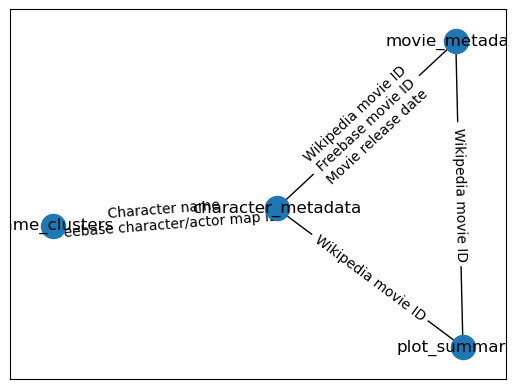

In [432]:
# create a graph with four nodes, each representing a dataframe using networkx to model the dataframe's relationships

G = nx.Graph()

# add the four nodes to the graph (character_metadata, plot_summaries, movie_metadata, name_clusters)
nodes = ["character_metadata", "plot_summaries", "movie_metadata", "name_clusters"]

G.add_nodes_from(nodes)

# add edges to the graph to represent the relationships between the dataframes

G.add_edges_from([("character_metadata", "plot_summaries"), ("character_metadata", "movie_metadata"), ("character_metadata", "name_clusters"),
                  ("plot_summaries", "movie_metadata")])

# add labels to the edges

G.edges["character_metadata", "plot_summaries"]['label'] = "Wikipedia movie ID"
G.edges["character_metadata", "movie_metadata"]['label'] = "Wikipedia movie ID\nFreebase movie ID\nMovie release date"
G.edges["character_metadata", "name_clusters"]['label'] = "Character name\nFreebase character/actor map ID"
G.edges["plot_summaries", "movie_metadata"]['label'] = "Wikipedia movie ID" 

# plot the graph with edge labels

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
edge_labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
plt.show()

#### character_metadata -> movie_metadata

In [433]:
# check if each value of the column Wikipedia movie ID of character_metadata appears in the column Wikipedia movie ID of movie_metadata

character_metadata['Wikipedia movie ID'].isin(movie_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True    450669
Name: count, dtype: int64

In [434]:
# check if each value of the column Freebase movie ID of character_metadata appears in the column Freebase movie ID of movie_metadata

character_metadata['Freebase movie ID'].isin(movie_metadata['Freebase movie ID']).value_counts()

Freebase movie ID
True    450669
Name: count, dtype: int64

In [435]:
# check if each value of the column Movie release date of character_metadata appears in the column Movie release date of movie_metadata

character_metadata['Movie release date'].isin(movie_metadata['Movie release date']).value_counts()

Movie release date
True    450669
Name: count, dtype: int64

#### movie_metadata -> character_metadata

In [436]:
# check if each value of the column Wikipedia movie ID of movie_metadata appears in the column Wikipedia movie ID of character_metadata

movie_metadata['Wikipedia movie ID'].isin(character_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     64330
False    17411
Name: count, dtype: int64

In [437]:
# check if each value of the column Freebase movie ID of movie_metadata appears in the column Freebase movie ID of character_metadata

movie_metadata['Freebase movie ID'].isin(character_metadata['Freebase movie ID']).value_counts()

Freebase movie ID
True     64330
False    17411
Name: count, dtype: int64

In [438]:
# check if each value of the column Movie release date of movie_metadata appears in the column Movie release date of character_metadata

movie_metadata['Movie release date'].isin(character_metadata['Movie release date']).value_counts()

Movie release date
True     79613
False     2128
Name: count, dtype: int64

#### character_metadata -> name_cluster

In [439]:
# check if each value of the column Character name of character_metadata appears in the column Character name of name_clusters

character_metadata['Character name'].isin(name_clusters['Character name']).value_counts()

Character name
False    446369
True       4300
Name: count, dtype: int64

In [440]:
# check if each value of the column Freebase character/actor map ID of character_metadata appears in the column Freebase character/actor map ID of name_clusters

character_metadata['Freebase character/actor map ID'].isin(name_clusters['Freebase character/actor map ID']).value_counts()

Freebase character/actor map ID
False    448008
True       2661
Name: count, dtype: int64

#### name_cluster -> character_metadata

In [441]:
# check if each value of the column Character name of name_clusters appears in the column Character name of character_metadata

name_clusters['Character name'].isin(character_metadata['Character name']).value_counts()

Character name
True    2666
Name: count, dtype: int64

In [442]:
# check if each value of the column Freebase character/actor map ID of name_clusters appears in the column Freebase character/actor map ID of character_metadata

name_clusters['Freebase character/actor map ID'].isin(character_metadata['Freebase character/actor map ID']).value_counts()

Freebase character/actor map ID
True    2666
Name: count, dtype: int64

#### character_metadata -> plot_summaries

In [443]:
# check if each value of the column Wikipedia movie ID of character_metadata appears in the column Wikipedia movie ID of plot_summaries

character_metadata['Wikipedia movie ID'].isin(plot_summaries['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     308485
False    142184
Name: count, dtype: int64

#### plot_summaries -> character_metadata

In [444]:
# check if each value of the column Wikipedia movie ID of plot_summaries appears in the column Wikipedia movie ID of character_metadata

plot_summaries['Wikipedia movie ID'].isin(character_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     37779
False     4524
Name: count, dtype: int64

#### movie_metadata -> plot_summaries

In [445]:
# check if each value of the column Wikipedia movie ID of movie_metadata appears in the column Wikipedia movie ID of plot_summaries

movie_metadata['Wikipedia movie ID'].isin(plot_summaries['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     42204
False    39537
Name: count, dtype: int64

#### plot_summaries -> movie_metadata

In [446]:
# check if each value of the column Wikipedia movie ID of plot_summaries appears in the column Wikipedia movie ID of movie_metadata

plot_summaries['Wikipedia movie ID'].isin(movie_metadata['Wikipedia movie ID']).value_counts()

Wikipedia movie ID
True     42204
False       99
Name: count, dtype: int64

## Distribution of the data

Let's visualize the amount of film produced by the top 10 country

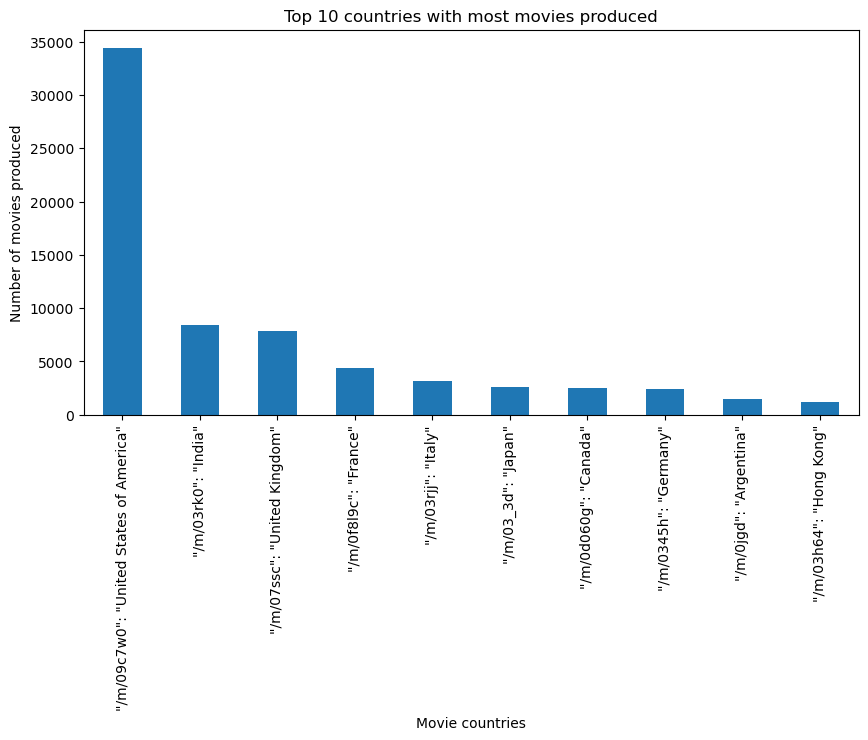

In [447]:
# Converting the dictionnary structure to a list, and renaming the col
country_list = pd.DataFrame(movie_metadata['Movie countries'].tolist())
country_list.rename(columns={0: 'Movie countries'}, inplace=True)

# Since some movie are coproduced by several countries, we seperate them into different rows. 
# This way, a film produced by two countries will account for +1 production for each country

country_list = country_list['Movie countries'].str.split(', ', expand=True)

# Droping NAN and converting to a Dataframe
country_stacked = country_list.stack().dropna().rename('Movie countries')

country_stacked = pd.DataFrame(country_stacked)

# Drop rows where 'Movie countries' is an empty string '{}'
country_stacked = country_stacked[country_stacked['Movie countries'] != '{}']
country_stacked = country_stacked['Movie countries'].str.replace("{", "")
country_stacked = pd.DataFrame(country_stacked)
country_stacked = country_stacked['Movie countries'].str.replace("}", "")

# Counting the number of movies produced by country
country_stacked = pd.DataFrame(country_stacked)
country_count = country_stacked.groupby(['Movie countries']).size()
country_count.head()


# Plotting top 10 countries with most movies produced
country_count.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), title='Top 10 countries with most movies produced')
plt.ylabel('Number of movies produced')
plt.show()



We can see that a large number of film are profuced by USA, followed by India and United Kingdom. We can analyzing the percentage of film they produced or coproduced.

In [448]:
# Percentage of movies produced by USA and India

# Sorting the values in descending order
country_sorted = country_count.sort_values(ascending=False)

# Printing the percentage of movies produced by USA and India
print('Percentage of movies produced by USA: ', country_sorted[0].sum() / country_count.sum() * 100, '%')
print('Percentage of movies produced by India: ', country_sorted[1].sum() / country_count.sum() * 100, '%')
print('Percentage of movies produced by UK : ', country_sorted[2].sum() / country_count.sum() * 100, '%')

Percentage of movies produced by USA:  39.80610604009764 %
Percentage of movies produced by India:  9.730561436388667 %
Percentage of movies produced by UK :  9.102372771549879 %


Let's visualize the 10 most produced movie genre

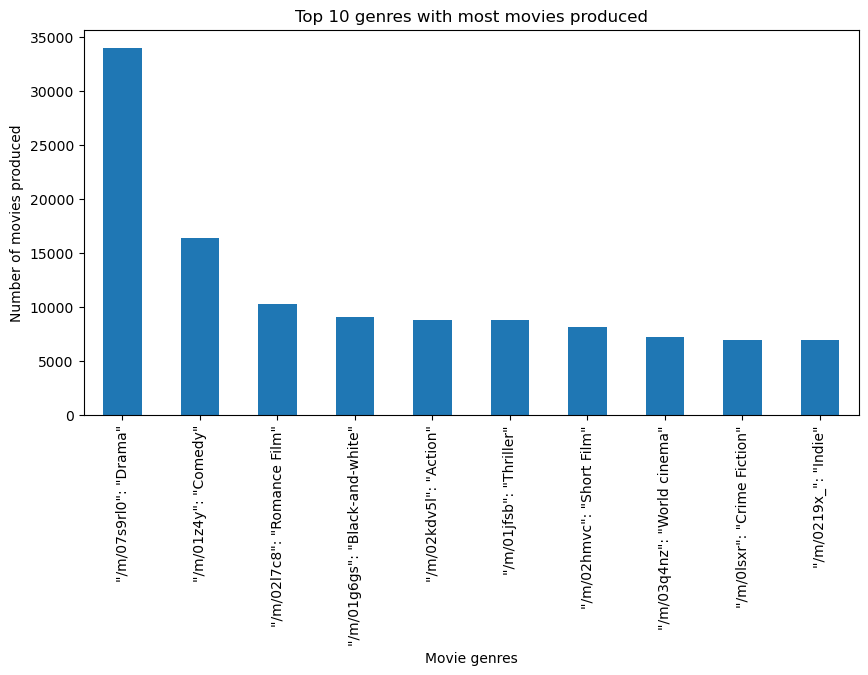

In [449]:
# Converting the dictionnary structure to a list, and renaming the col
genre_list = pd.DataFrame(movie_metadata['Movie genres'].tolist())
genre_list.rename(columns={0: 'Movie genres'}, inplace=True)

# Since some movie are coproduced by several countries, we seperate them into different rows. 
# This way, a film produced by two countries will account for +1 production for each genre

genre_list = genre_list['Movie genres'].str.split(', ', expand=True)

# Droping NAN and converting to a Dataframe
genre_stacked = genre_list.stack().dropna().rename('Movie genres')

genre_stacked = pd.DataFrame(genre_stacked)

# Drop rows where 'Movie countries' is an empty string '{}'
genre_stacked = genre_stacked[genre_stacked['Movie genres'] != '{}']
genre_stacked = genre_stacked['Movie genres'].str.replace("{", "")
genre_stacked = pd.DataFrame(genre_stacked)
genre_stacked = genre_stacked['Movie genres'].str.replace("}", "")

# Counting the number of movies produced by genre
genre_stacked = pd.DataFrame(genre_stacked)
genre_count = genre_stacked.groupby(['Movie genres']).size()
genre_count.head()


# Plotting top 10 countries with most movies produced
genre_count.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), title='Top 10 genres with most movies produced')
plt.ylabel('Number of movies produced')
plt.show()


Their pourcentage regarding the total production :

In [450]:
# Percentage of movies produced by USA and India

# Sorting the values in descending order
genre_sorted = genre_count.sort_values(ascending=False)

# Printing the percentage of movies produced by USA and India
print('Percentage of drama produced : ', genre_sorted[0].sum() / genre_count.sum() * 100, '%')
print('Percentage of comedy produced : ', genre_sorted[1].sum() / genre_count.sum() * 100, '%')
print('Percentage of romance produced : ', genre_sorted[2].sum() / genre_count.sum() * 100, '%')

Percentage of drama produced :  13.975728334888155 %
Percentage of comedy produced :  6.718886774695989 %
Percentage of romance produced :  4.205828322970135 %


Have does the number of film produced varies through the years ?


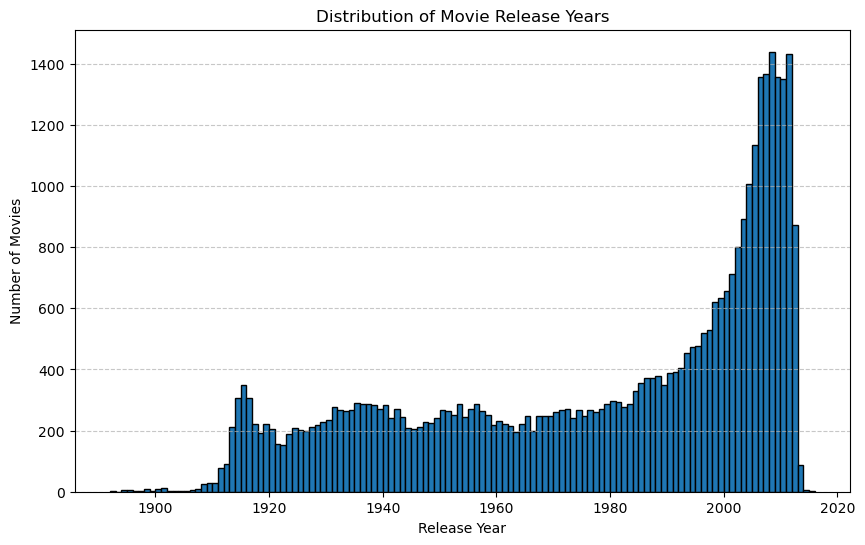

In [452]:
import numpy as np
#  Converting the column 'Movie released date' to datetime
movie_metadata['Movie year'] = pd.to_datetime(movie_metadata['Movie release date'], errors='coerce')

# Extracting the only the year
year = movie_metadata['Movie year'].dt.year

# Plotting an histogram of the number of movies released per year
plt.figure(figsize=(10, 6))
plt.hist(year.dropna(), bins=range(int(year.min()), int(year.max()) + 1), edgecolor='black')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

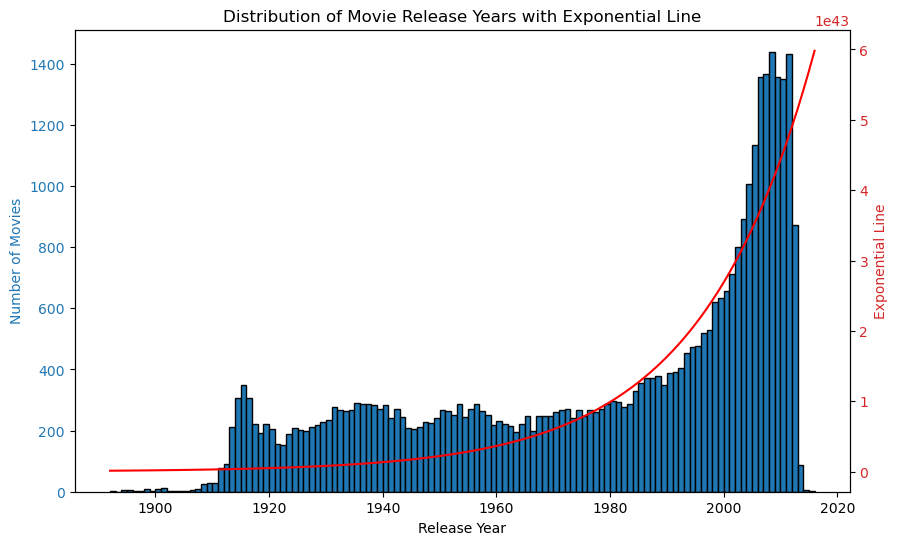

In [453]:
#  Converting the column 'Movie released date' to datetime
movie_metadata['Movie year'] = pd.to_datetime(movie_metadata['Movie release date'], errors='coerce')

# Extracting the only the year
year = movie_metadata['Movie year'].dt.year

fig, ax1 = plt.subplots(figsize=(10, 6))

# Creating an histogram plotting the values of 'year'
ax1.hist(year.dropna(), bins=range(int(year.min()), int(year.max()) + 1), edgecolor='black', label='Movie Releases')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Number of Movies', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Adding an exponential line
ax2 = ax1.twinx()
x_values = np.arange(int(year.min()), int(year.max()) + 1, 1)
y_values = np.exp(0.05 * x_values)  # You can adjust the exponent and other parameters
ax2.plot(x_values, y_values, label='Exponential Line', color='red')
ax2.set_ylabel('Exponential Line', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Distribution of Movie Release Years with Exponential Line')
plt.show()

Text(0, 0.5, 'IMDB rating')

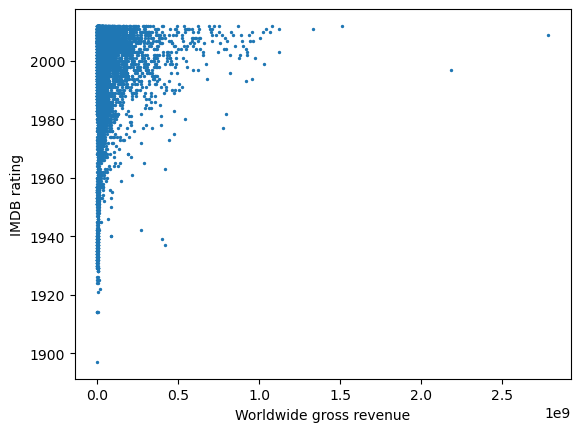

In [ ]:
#scatter plot between the number of movie produced  by year and the revenue of the movie

year_revenue = pd.concat([movie_metadata['Movie revenue'], year], axis= 1, ignore_index=True)
year_revenue.dropna()
plt.scatter(year_revenue[0], year_revenue[1], s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

